# 행렬

In [1]:
from sympy import *
init_printing(use_unicode=True)

심파이에서 행렬을 만드는데 `Matrix` 객체를 사용한다.
행렬을 구성하는 행벡터 리스트를 조합해서 행렬을 생성한다.
예를 들어, 다음과 같은 행렬을 생성하려면,

$\left[\begin{array}{cc}1 & -1\\3 & 4\\0 & 2\end{array}\right]$

다음과 같이 작성한다.

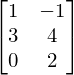

In [3]:
Matrix([[1, -1], [3, 4], [0, 2]])

칼럼 벡터를 쉽게 생성하도록, 리스트 요소가 칼럼벡터로 간주된다.

In [4]:
Matrix([1,2,3])

심파이 혹은 파이썬 다른 객체와 마찬가지 방식으로 행렬을 조작한다.

In [6]:
M = Matrix([[1, 2, 3], [3, 2, 1]])
N = Matrix([0, 1, 1])
M*N

심파이 행렬에 대해 주의할 한가지 점은 심파이 다른 객체와 달리 변경가능하다는 것이다.
다음에 살펴보게 되듯이 행렬을 그때 그때 변경할 수 있다는 것을 의미한다.
이것이 갖는 단점은 `Matrix`를 심파이 표현식 내부 혹은 딕셔너리 키와 같이 변경가능하지 않는 것이 필요한 곳에는 사용할 수 없다. `Matrix`에 대한 변경불가한 것이 필요한 경우 `ImmutableMatrix`를 사용한다.

## 기본연산

### 형태(Shape)

`Matrix`에 대한 기본 연산자가 다음에 있다. `shape`를 사용해서 행렬 형태를 얻는다.

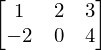

In [28]:
M = Matrix([[1, 2, 3], [-2, 0, 4]])
M

In [29]:
M.shape

## 행과 열에 접근하기

행렬에서 행 혹은 열을 뽑아내려면, `row` 혹은 `col` 메쏘드를 사용한다.
예를 들어, `M.row(0)` 명령어는 첫번째 행을 뽑아낸다.
`M.col[-1]` 명령어는 마지막 칼럼을 뽑아낸다.

In [30]:
M.row(0)

In [31]:
M.col(-1)

## 행과 열을 삭제하고 삽입하기

행과 열을 삭제하는데 `row_del`, `col_del` 명령어를 사용한다.
이 연산자는 행렬을 그자리에서 바로 변경시킨다.

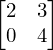

In [32]:
M.col_del(0)
M

In [33]:
M.row_del(1)
M

행과 열을 삽입하는데, `row_insert` 혹은 `col_insert` 메쏘드를 사용한다.
이 연산은 그자리에서 바로 작동하지 않는다.

In [34]:
M

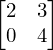

In [35]:
M = M.row_insert(1, Matrix([[0,4]]))
M

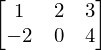

In [36]:
M = M.col_insert(0, Matrix([1,-2]))
M

명시적으로 언급하지 않는 경우, 다음에 언급되는 메쏘드는 그자리에서 바로 동작하지는 않는다.
일반적으로, 그자리에서 작동하지 않는 메쏘드는 신규 `Matrix`를 반환하고, 작동하는 메쏘드는 `None`을 반환한다.

## 기본 메쏘드

앞에서 언급했듯이, 더하기와 곱하기 같은 단순한 연산은 `+`, `*`, `**` 기호를 사용해서 수행된다.
역행렬을 구하는 경우, `-1` 거듭제곱만 하면 된다.

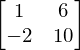

In [74]:
M = Matrix([[1, 3], [-2, 3]])
N = Matrix([[0, 3], [0, 7]])
M + N

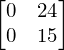

In [75]:
M * N

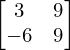

In [76]:
3*M

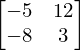

In [77]:
M**2

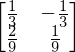

In [78]:
M**-1

In [79]:
N**-1

ValueError: Matrix det == 0; not invertible.

전치 행렬을 구하려면, `T`를 사용한다.

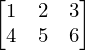

In [43]:
M = Matrix([[1, 2, 3], [4, 5, 6]])
M

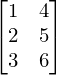

In [44]:
M.T

## 행렬 생성자

일반적인 행렬을 생성하는 경우 생성자가 몇개 존재한다.
단위행렬을 생성하는 경우, `eye`를 사용한다.
`eye(n)` 명령어는 $n \times n$ 행렬을 생성시킨다.

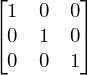

In [46]:
eye(3)

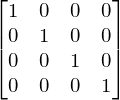

In [47]:
eye(4)

모든 요소가 0이 되는 행렬을 생성하려면, `zeros`를 사용한다.
`zeros(n,m)` 명령어는 모두 0인 $n \times m$ 행렬을 생성시킨다.

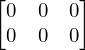

In [50]:
zeros(2,3)

마찬가지로, `ones` 명령어는 모두 1인 행렬을 생성시킨다.

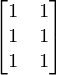

In [51]:
ones(3,2)

대각행렬을 생성하려면, `diag` 명령어를 사용한다.
`diag` 명령어에 들어가는 인자는 숫자 혹은 행렬이 될 수 있다.
숫자는 $1 \times 1$ 행렬로 간주된다. 행렬이 대각선으로 쌓이게 된다.
나머지 요소는 0으로 채워진다.

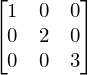

In [52]:
diag(1,2,3)

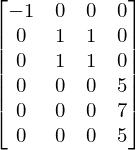

In [54]:
diag(-1, ones(2,2), Matrix([5,7,5]))

## 고급 방법

### 행렬식

행렬에 대한 행렬식(determinant)를 계산하려면, `det`를 사용한다.

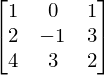

In [55]:
M = Matrix([[1, 0, 1], [2, -1, 3], [4, 3, 2]])
M

In [56]:
M.det()

### 기약행 사다리꼴(reduced row echelon form, RREF)

행렬을 기약행 사다리꼴로 표현하려면,
`rref` 메쏘드를 사용한다.
`rref`는 두 요소를 갖는 튜플을 반환한다.
첫번째는 기약행 사다리꼴이고, 두번째는 추측 칼럼 인덱스 리스트가 된다.

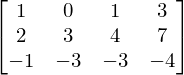

In [57]:
M = Matrix([[1, 0, 1, 3], [2, 3, 4, 7], [-1, -3, -3, -4]])
M

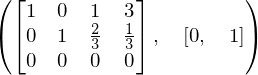

In [58]:
M.rref()

> `rref`로 반환되는 튜플 첫번째 요소는 자료형이 `Matrix`이며, 두번째는 자료형이 `list` 리스트다.

### 영공간(null space)

행렬의 영공간을 찾으려면, `columnspace` 메쏘드를 사용한다.
`columnspace` 메쏘드는 행렬 열공간을 생성하는 열벡터 리스트를 반환한다.

In [8]:
M = Matrix([[1, 1, 2], [2 ,1 , 3], [3 , 1, 4]])
M

⎡1  1  2⎤
⎢       ⎥
⎢2  1  3⎥
⎢       ⎥
⎣3  1  4⎦

In [9]:
M.columnspace()

⎡⎡1⎤, ⎡1⎤⎤
⎢⎢ ⎥  ⎢ ⎥⎥
⎢⎢2⎥  ⎢1⎥⎥
⎢⎢ ⎥  ⎢ ⎥⎥
⎣⎣3⎦  ⎣1⎦⎦

### 고유값, 고유벡터, 대각화

행렬의 고유값을 찾아내려면, `eigenvals` 메쏘드를 사용한다.
`eigenvals` 메쏘드는 `eigenvalue:algebraic multiplicity` 쌍에 대한 딕셔너리를 반환한다. ([roots](http://docs.sympy.org/latest/tutorial/solvers.html#tutorial-roots) 출력결과와 유사)

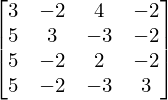

In [62]:
M = Matrix([[3, -2,  4, -2], [5,  3, -3, -2], [5, -2,  2, -2], [5, -2, -3,  3]])
M

In [63]:
M.eigenvals()

행렬 `M`이 -2, 3, 5 고유값을 갖고 있다는 것과 더불어,
고유값 -2 와 3은 대수적 1 중복을 갖고, 고유값 5는 대수적 중복 2를 갖는다.

행렬에 대한 고유벡터를 구하려면, `eigenvects` 메쏘드를 사용한다.
`eigenvects` 메쏘드는 `(eigenvalue:algebraic multiplicity, [eigenvectors])` 형태 튜플 리스트를 반환한다.

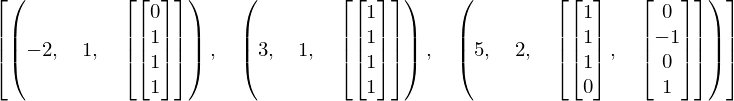

In [66]:
M.eigenvects()

예를 들어, 고유값 5는 기하적 중복 2를 갖는데, 고유벡터가 2이기 때문임을 나타내고 있다.
대수적으로 기하적으로 중복수는 모든 고유값에 대해 동일하기 때문에, `M` 행렬을 대각화 가능하다.

행렬을 대각화하기 위해서, `diagonalize` 메쏘드를 사용한다.
`diagonalize` 메쏘드는 $(P,D)$ 튜플을 반환한다. $D$는 대각이고, $M = PDP^-1$이다.

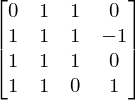

In [68]:
P, D = M.diagonalize()
P

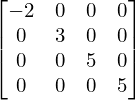

In [69]:
D

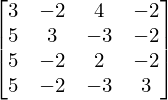

In [70]:
P*D*P**-1

In [71]:
P*D*P**-1 == M

True

`eigenvects`도 고유값을 포함하고 있기 때문에, 고유벡터도 필요한 경우 `eigenvals` 대신에 사용한다.
하지만, 고유벡터를 계산해내는 것이 연산량이 많기 때문에, 고유값만 필요한 경우 `eigenvals`가 선호된다.

원하는 것이 고유다항식인 경우, `charpoly` 메쏘드를 사용한다. `eigenvals`보다 더 효율적인데,
이유는 기호근(symbolic root)을 계산하는데 연산이 많이 소요되기 때문이다.

> ### 람다 {.callout}
>
> `lambda`는 파이썬에서 예약어로 $\lambda$ 기호를 생성하려면, 심파이 기호와 파이썬 변수에 동일한 명칭으로 인해 (`b`가 없는) `lamda`를 사용한다. 여전히 $\lambda$로 출력된다.


In [72]:
lamda = symbols('lamda')
p = M.charpoly(lamda)
factor(p)